In [32]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV file into a DataFrame
df = pd.read_csv("amazon_reviews.csv")


In [29]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
# Step 2: Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


In [8]:
# Step 3: Perform sentiment analysis on each review
def get_sentiment_score(text):
    if isinstance(text, str):
        return sia.polarity_scores(text)['compound']
    else:
        return 0.0  # or any other value you want to assign for non-string values

# Step 3: Perform sentiment analysis on each review
df['sentiment_score'] = df['reviewText'].apply(get_sentiment_score)



In [9]:
# Step 4: Categorize sentiment as Positive, Negative, or Neutral
def get_sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)


In [10]:

# Step 5: Answer the questions or perform any analysis as needed
average_rating = df['overall'].mean()
positive_reviews_count = df[df['sentiment_category'] == 'Positive'].shape[0]
negative_reviews_count = df[df['sentiment_category'] == 'Negative'].shape[0]
neutral_reviews_count = df[df['sentiment_category'] == 'Neutral'].shape[0]

print("Average Rating:", average_rating)
print("Number of Positive Reviews:", positive_reviews_count)
print("Number of Negative Reviews:", negative_reviews_count)
print("Number of Neutral Reviews:", neutral_reviews_count)

Average Rating: 4.587589013224822
Number of Positive Reviews: 3707
Number of Negative Reviews: 843
Number of Neutral Reviews: 365


In [31]:


# Step 1: Group the data by 'reviewerName' and calculate the average rating for each reviewer
average_ratings = df.groupby('reviewerName')['overall'].mean()

# Step 2: Sort the reviewers based on their average ratings in descending order
sorted_reviewers = average_ratings.sort_values(ascending=False)

# Step 3: Get the reviewers with the highest average ratings (top N reviewers)
num_top_reviewers = 10  # Change this number to get the desired number of top reviewers
top_reviewers = sorted_reviewers.head(num_top_reviewers)

# Step 4: Print the results
print("Reviewers with the highest average rating:")
for reviewer, average_rating in top_reviewers.items():
    print(f"{reviewer}: {average_rating:.2f}")




Reviewers with the highest average rating:
***Andy***: 5.00
Phil: 5.00
Pedro de Pacas: 5.00
Peggy: 5.00
Pen Name: 5.00
Peppy: 5.00
Perez: 5.00
Peri "Periklis R": 5.00
Perry Hopper Sr: 5.00
Perry W. Chamberlain "canoe man": 5.00


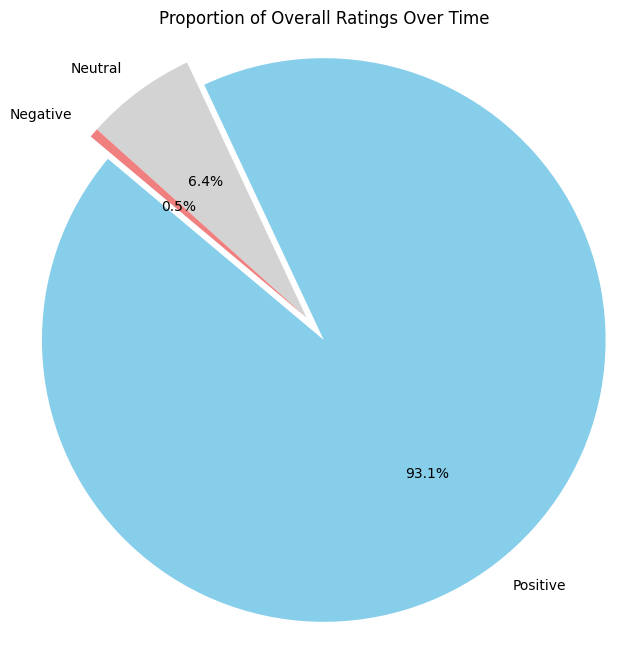

In [37]:

import matplotlib.pyplot as plt

# Step 1: Convert 'reviewTime' column to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Step 2: Group the data by 'reviewTime' and calculate the average overall rating for each time period
average_ratings_over_time = df.groupby('reviewTime')['overall'].mean()

# Step 3: Summarize the average overall ratings into different categories
positive = average_ratings_over_time[average_ratings_over_time >= 4].sum()
neutral = average_ratings_over_time[(average_ratings_over_time >= 3) & (average_ratings_over_time < 4)].sum()
negative = average_ratings_over_time[average_ratings_over_time < 3].sum()

# Step 4: Create a pie chart
labels = ['Positive', 'Neutral', 'Negative']
ratings = [positive, neutral, negative]
colors = ['skyblue', 'lightgray', 'lightcoral']
explode = (0.1, 0, 0)  # Explode the first slice (Positive) to highlight it

plt.figure(figsize=(8, 8))
plt.pie(ratings, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Overall Ratings Over Time')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [45]:

# Step 1: Define a function to categorize the reviews based on overall rating
def categorize_overall(overall):
    if overall == 5:
        return 'Positive'
    elif overall == 4:
        return 'Positive'
    elif overall == 3:
        return 'Neutral'
    elif overall == 2:
        return 'Negative'
    elif overall == 1:
        return 'Negative'
    else:
        return 'Unknown'  # In case there are other ratings not covered in the above conditions

# Step 2: Apply the categorize_overall function to create a new column 'review_category'
df['review_category'] = df['overall'].apply(categorize_overall)

# Now the 'df' DataFrame will have a new column 'review_category' that represents the category of each review based on its overall rating.
print(df['review_category'])


0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
4910    Negative
4911    Positive
4912    Positive
4913    Positive
4914    Positive
Name: review_category, Length: 4915, dtype: object
